<a href="https://colab.research.google.com/github/nhosamani/Machine_Learning/blob/main/ClusteringML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('/content/house_rental.csv')

In [23]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [24]:
df[df.duplicated()]

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [25]:
df.isnull().sum().sum()

0

In [26]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [28]:
df['Rooms']=df['Bedroom']+df['Living.Room']+df['Bathroom']

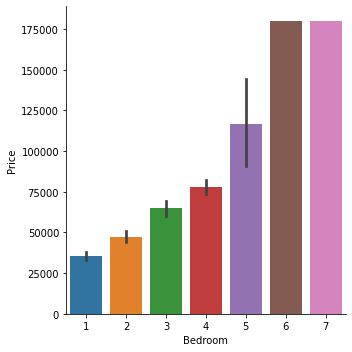

In [29]:
#Bedroom vise Pricing of Data.
sns.catplot(x='Bedroom',y='Price',data=df,kind='bar')

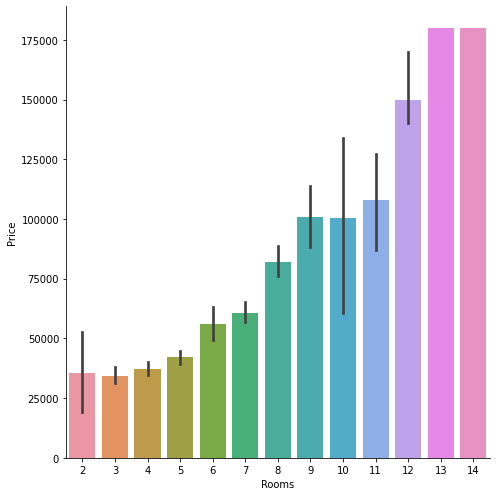

In [30]:
#Rooms vs Price 
sns.catplot(x='Rooms',y='Price',data=df,kind='bar',height=7)

In [13]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Rooms
0,1177.698,2,7,2,2,2,62000,6
1,2134.800,5,7,4,2,2,78000,8
2,1138.560,5,7,2,2,1,58000,5
3,1458.780,2,7,3,2,2,45000,7
4,967.776,11,14,3,2,2,45000,7


In [31]:
X=df.iloc[:,:].values

In [32]:
from sklearn.cluster import KMeans

In [35]:
k_means=KMeans(n_clusters=5,init="k-means++",random_state=6)
k_means.fit(X)
print(k_means.labels_)

[2 4 2 0 0 3 2 2 0 2 0 0 0 2 2 4 2 0 4 0 3 4 2 4 1 4 1 3 0 0 2 4 2 2 0 2 0
 2 1 0 3 2 0 2 2 2 2 4 1 0 4 2 0 0 1 4 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 4 0
 0 4 2 0 4 0 2 0 0 2 0 0 3 2 4 2 2 2 2 4 2 2 2 4 2 2 4 2 4 3 3 4 4 0 2 4 2
 2 4 2 4 2 3 0 0 0 2 2 2 4 3 2 2 4 0 0 4 2 4 0 4 2 0 4 4 4 3 2 2 0 0 0 4 1
 0 2 4 4 2 2 0 0 2 2 0 0 2 0 0 1 0 4 4 4 2 0 2 4 4 3 0 4 4 0 2 0 0 0 3 0 0
 0 0 0 0 2 0 0 4 2 2 4 2 0 0 0 0 2 0 0 2 2 0 0 2 2 2 0 4 0 2 0 2 3 0 4 2 2
 4 0 3 0 0 0 4 2 4 4 4 4 2 0 2 2 0 2 0 2 3 2 3 2 3 2 3 0 4 2 2 2 0 0 4 0 2
 2 0 0 2 0 0 0 0 0 0 2 2 4 0 0 0 0 0 4 4 0 0 2 2 0 4 2 1 4 0 4 2 0 3 0 2 2
 4 4 4 1 2 2 2 4 2 0 4 2 0 0 2 0 2 0 2 2 4 4 4 2 2 0 3 2 0 2 2 1 0 2 2 4 0
 3 2 0 2 0 0 2 2 0 2 2 0 0 0 3 0 0 2 0 4 2 2 4 2 2 4 4 2 2 2 0 0 0 4 2 0 0
 0 0 0 2 2 0 0 4 0 2 4 2 2 0 0 2 4 0 2 0 2 3 2 0 0 4 4 0 0 0 0 4 4 0 0 0 0
 0 0 0 0 0 0 2 0 0 2 3 0 0 0 0 2 4 4 4 4 1 2 0 4 4 0 0 4 1 0 0 2 0 0 2 4 3
 4 3 4 0 2 0 2 0 0 0 0 2 0 2 2 2 4 2 0 4 0 0 2 3 0 1 4 4 4 2 4 0 0 2 0 2 4
 4 4 4 4 0 0 0 2 0 0 3 4 

In [36]:
WCSS=[]
for k in range(1,15):
  k_means=KMeans(n_clusters=k,init="k-means++",random_state=6)
  k_means.fit(X)
  WCSS.append(k_means.inertia_)


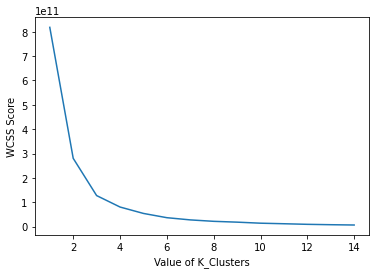

In [37]:
plt.plot(range(1,15),WCSS)
plt.xlabel("Value of K_Clusters")
plt.ylabel("WCSS Score")
plt.show()

In [38]:
print("From the above plot referring to ELBOW Method\nit is evident that value of k is 3")

From the above plot referring to ELBOW Method
it is evident that value of k is 3


In [53]:
# Clustering again with K Value =3
k_means=KMeans(n_clusters=3,init="k-means++",random_state=6)
k_means.fit(X)
print(k_means.labels_)

[1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 2 1 0 2 1 2 0 2 0 0 1 1 1 2 1 1 1 1 1
 1 0 1 0 1 1 1 2 1 1 2 0 1 2 2 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 2 1 1 2 1 1 1 1 1 1 1 0 1 2 2 2 2 1 2 1 1 2 2 1 2 2 1 2 0 0 2 2 1 1 2 1
 1 2 1 2 1 0 1 1 1 1 1 2 2 2 1 1 2 1 1 2 1 2 1 2 1 1 2 2 2 0 1 1 1 1 1 2 0
 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 0 1 2 2 2 1 1 1 2 2 2 1 2 2 1 1 1 1 1 0 1 1
 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1
 2 1 2 1 1 1 2 1 2 2 2 2 1 1 1 1 1 2 1 1 0 1 2 1 0 1 2 1 2 1 2 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 0 2 1 2 1 1 2 1 1 1
 2 2 2 0 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 0 2 1 1 1 0 1 1 1 2 1
 0 2 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 0 1 1 2 2 1 1 2 0 1 1 2 1 1 1 2 0
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 0 1 0 2 2 2 1 2 1 1 1 1 1 2
 2 2 2 2 1 1 1 1 1 1 0 2 